In [1]:
import geojson

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Experiment 1:
#grid 3586 - working area
#grid 4283 - transport area
#grid 5339 - home area

hours_of_interest = [96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
normalized = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

dfs = pd.DataFrame({})

for i in range(1,10):
    df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['time'])
    dfs = dfs.append(df)
df = pd.read_csv('./csv/sms-call-internet-mi-2013-11-10.csv', parse_dates=['time'])
dfs = dfs.append(df)
dfs = dfs.fillna(0)

In [3]:
#Group by hours and aggregate values according to each cell/hour
dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
dfgr['hour'] = dfgr.time.dt.hour+24*(dfgr.time.dt.day-1)
dfgg = dfgr[['hour', 'cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['hour', 'cellid'], as_index=False).sum()
dfgg = dfgg.set_index(['hour']).sort_index()
print(dfgg)

#Group by hours and aggregate values according to the hour
#dfgr = dfs[['cellid', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['time', 'cellid'], as_index=False).sum()
#dfgr['hour'] = dfgr.time.dt.hour+24*(dfgr.time.dt.day-1)
#dfgg = dfgr[['hour', 'time', 'smsin','smsout', 'callin','callout', 'internet']].groupby(['hour'], as_index=False).sum()
#dfgg = dfgg.set_index(['hour']).sort_index()
#print(dfgg)

              smsin         smsout         callin        callout      internet
hour                                                                          
0     122133.937438   99854.500391   46430.908863   54806.248315  3.623713e+06
1      78865.249034   72349.680802   26904.141956   34178.043675  3.087452e+06
2      56241.202155   53626.620764   18588.392375   24601.607427  2.668823e+06
3      42279.171870   46501.954632   13227.274446   20151.556831  2.366074e+06
4      30291.692765   38776.742872   10220.831944   16239.305141  2.158129e+06
...             ...            ...            ...            ...           ...
235   306374.723603  185498.345169  197755.680820  237122.533150  4.871719e+06
236   278450.299421  193594.393022  154320.961822  185747.872138  4.769914e+06
237   251429.544787  193862.226300  103458.070310  125072.526729  4.777989e+06
238   217679.883044  186657.528780   66708.784957   78001.369744  4.576466e+06
239   137460.669493  130626.590818   38536.335988   

In [4]:
#dfs.max()

Unnamed: 0                 5918855
cellid                       10000
time           2013-11-10 23:50:00
countrycode                  97259
smsin                    632.07321
smsout                  594.488542
callin                  287.525497
callout                 301.146658
internet                7936.26538
dtype: object

In [5]:
cells = dfgg.cellid
scaler=MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(dfgg), columns=dfgg.columns, index=dfgg.index)

In [6]:
dfgg=scaled
dfgg['cellid']=cells
print(dfgg)

         smsin    smsout    callin   callout  internet
hour                                                  
0     0.162062  0.297547  0.086856  0.088749  0.418401
1     0.097987  0.192932  0.047629  0.050513  0.301745
2     0.064483  0.121718  0.030923  0.032762  0.210677
3     0.043807  0.094619  0.020153  0.024513  0.144818
4     0.026055  0.065236  0.014113  0.017262  0.099582
...        ...       ...       ...       ...       ...
235   0.434900  0.623295  0.390855  0.426687  0.689890
236   0.393547  0.654089  0.303598  0.331460  0.667743
237   0.353533  0.655107  0.201419  0.218993  0.669500
238   0.303554  0.627704  0.127593  0.131743  0.625661
239   0.184759  0.414589  0.070997  0.071658  0.491877

[240 rows x 5 columns]


In [7]:
#dfgg.to_csv("./csv/normalized2.csv")
dfgr = dfgg

In [8]:
#dfgr.describe()
#########################################################
#From 01-11 to 10-11 (01,02,03 are weekend/festive days)#
#########################################################

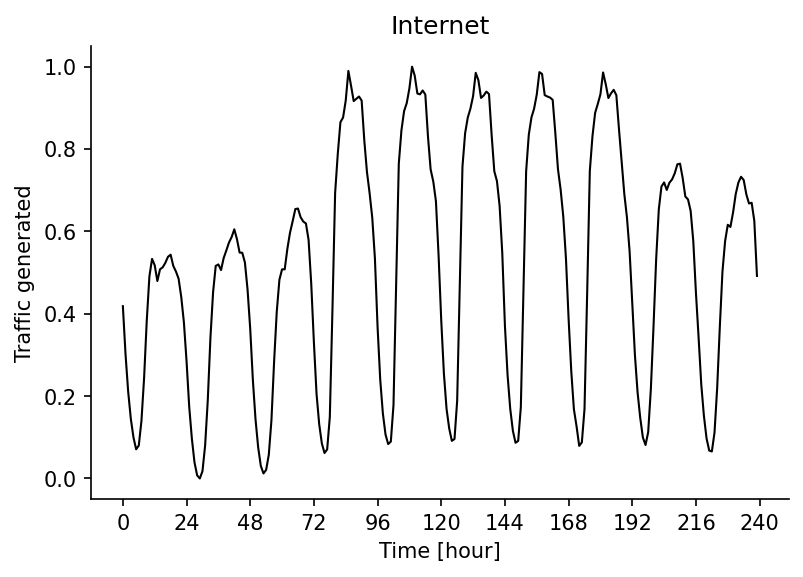

In [9]:
#Office area - industrial zone
ydatai1 = dfgg['internet']
xdatai1 = dfgg['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-')
plt.title("Internet")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
#plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

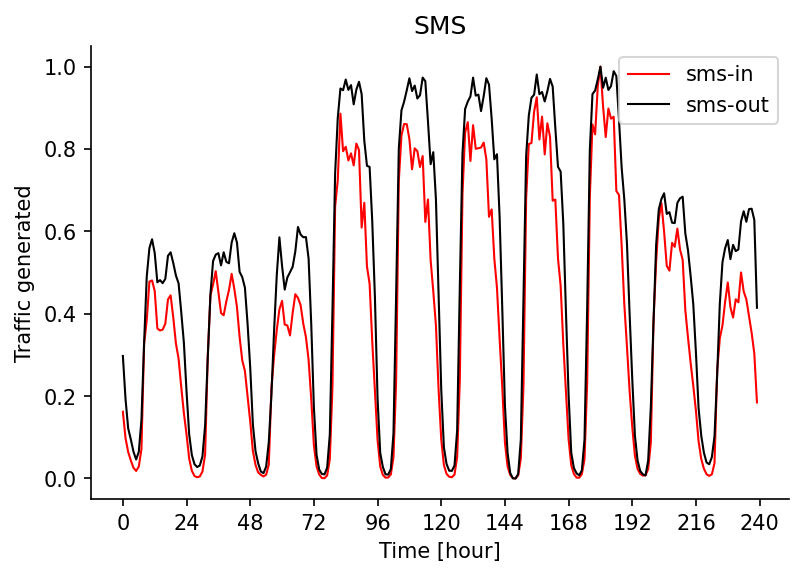

In [10]:
#Office area - industrial zone
ydatai1 = dfgg['smsin']
xdatai1 = dfgg['smsin'].index
ydatai2 = dfgg['smsout']
xdatai2 = dfgg['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='sms-in')
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='sms-out')
plt.title("SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

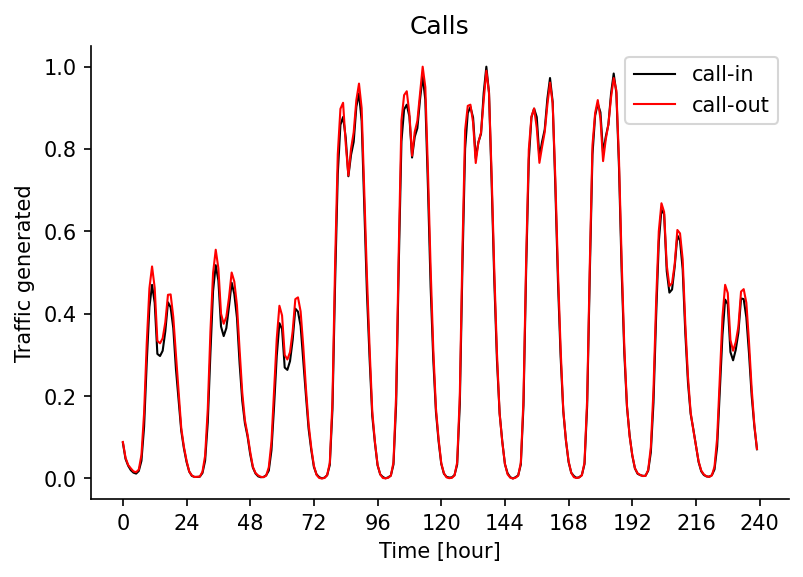

In [11]:
#Office area - industrial zone
ydatai1 = dfgg['callin']
xdatai1 = dfgg['callin'].index
ydatai2 = dfgg['callout']
xdatai2 = dfgg['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='call-in')
plt.plot(xdatai2, ydatai2, color='red', linewidth=1, linestyle='-', label='call-out')
plt.title("Calls")
plt.xlabel("Time [hour]")
plt.ylabel("Traffic generated")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.show()

In [12]:
print("CELL 3586 - office area")

CELL 3586 - office area


In [13]:
#Office area - industrial zone
ydatai1 = dfgr[dfgr.cellid==3586]['internet']
xdatai1 = dfgr[dfgr.cellid==3586]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Working area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Internet Connections - Milan")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24]) #working day - weekday
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine() #removes right and top spines from the plot
#plt.savefig('./wday-time/int-work.png')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'cellid'

In [ ]:

ydatasi1 = dfgr[dfgr.cellid==3586]['smsin']
xdatasi1 = dfgr[dfgr.cellid==3586]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-work.png')
plt.show()

In [ ]:

ydataso1 = dfgr[dfgr.cellid==3586]['smsout']
xdataso1 = dfgr[dfgr.cellid==3586]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing SMS - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-work.png')
plt.show()

In [ ]:

ydataci1 = dfgr[dfgr.cellid==3586]['callin']
xdataci1 = dfgr[dfgr.cellid==3586]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Incoming calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.xlim([0,168])
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-work.png')
plt.show()

In [ ]:

ydataco1 = dfgr[dfgr.cellid==3586]['callout']
xdataco1 = dfgr[dfgr.cellid==3586]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-work-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='black', linewidth=1, linestyle='-', label='Office area - data')
plt.title("Outgoing calls - working area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-work.png')
plt.show()

In [ ]:
print("CELL 4283 - transport area - highway")

In [ ]:
#Transport area (highway) data
ydatai2 = dfgr[dfgr.cellid==4283]['internet']
xdatai2 = dfgr[dfgr.cellid==4283]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai2, ydatai2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Internet Connections - Transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-trans.png')
plt.show()

In [ ]:

ydatasi2 = dfgr[dfgr.cellid==4283]['smsin']
xdatasi2 = dfgr[dfgr.cellid==4283]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi2, ydatasi2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-trans.png')
plt.show()

In [ ]:

ydataso2 = dfgr[dfgr.cellid==4283]['smsout']
xdataso2 = dfgr[dfgr.cellid==4283]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso2, ydataso2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing SMS - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-trans.png')
plt.show()

In [ ]:

ydataci2 = dfgr[dfgr.cellid==4283]['callin']
xdataci2 = dfgr[dfgr.cellid==4283]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci2, ydataci2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Incoming calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-trans.png')
plt.show()

In [ ]:

ydataco2 = dfgr[dfgr.cellid==4283]['callout']
xdataco2 = dfgr[dfgr.cellid==4283]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-trans-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco2, ydataco2, color='black', linewidth=1, linestyle='-', label='Highway - data')
plt.title("Outgoing calls - transport area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-trans.png')
plt.show()

In [ ]:
print("CELL 5343 - home area - Via Rembrandt")

In [ ]:
#Home area (near Via Rembrandt) data
ydatai3 = dfgr[dfgr.cellid==5343]['internet']
xdatai3 = dfgr[dfgr.cellid==5343]['internet'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-home-full.png')
plt.close('all')
##########################################################
f = plt.figure(dpi=150)
plt.plot(xdatai3, ydatai3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Internet Connections - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/int-home.png')
plt.show()

In [ ]:

ydatasi3 = dfgr[dfgr.cellid==5343]['smsin']
xdatasi3 = dfgr[dfgr.cellid==5343]['smsin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdatasi3, ydatasi3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsin-home.png')
plt.show()

In [ ]:

ydataso3 = dfgr[dfgr.cellid==5343]['smsout']
xdataso3 = dfgr[dfgr.cellid==5343]['smsout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataso3, ydataso3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing SMS - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/smsout-home.png')
plt.show()

In [ ]:

ydataci3 = dfgr[dfgr.cellid==5343]['callin']
xdataci3 = dfgr[dfgr.cellid==5343]['callin'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataci3, ydataci3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Incoming calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callin-home.png')
plt.show()

In [ ]:

ydataco3 = dfgr[dfgr.cellid==5343]['callout']
xdataco3 = dfgr[dfgr.cellid==5343]['callout'].index
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xticks([0, 24, 48, 72, 96, 120, 144, 168, 192, 216, 240])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-home-full.png')
plt.close('all')
###########################################################
f = plt.figure(dpi=150)
plt.plot(xdataco3, ydataco3, color='black', linewidth=1, linestyle='-', label='Via Rembrandt - data')
plt.title("Outgoing calls - Home area")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
#plt.ylim([0,4000])
plt.legend()
sns.despine()
#plt.savefig('./wday-time/callout-home.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdatai1, ydatai1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatai2, ydatai2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatai3, ydatai3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Internet traffic")
plt.xlabel("Time [hour]")
plt.ylabel("Internet connections [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/internet-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdatasi1, ydatasi1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdatasi2, ydatasi2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdatasi3, ydatasi3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsin-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdataso1, ydataso1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataso2, ydataso2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataso3, ydataso3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing SMS")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing SMS [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/smsout-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdataci1, ydataci1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataci2, ydataci2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataci3, ydataci3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Incoming calls")
plt.xlabel("Time [hour]")
plt.ylabel("Incoming calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callin-comparative2.png')
plt.show()

In [ ]:
f = plt.figure(dpi=150)
plt.plot(xdataco1, ydataco1, color='red', linewidth=1, linestyle='-', label='Office - data')
plt.plot(xdataco2, ydataco2, color='green', linewidth=1, linestyle='-', label='Transport - data')
plt.plot(xdataco3, ydataco3, color='blue', linewidth=1, linestyle='-', label='Home - data')
plt.title("Outgoing calls")
plt.xlabel("Time [hour]")
plt.ylabel("Outgoing calls [#]")
plt.xlim([96,96+24])
plt.xticks(hours_of_interest, normalized)
plt.legend()
sns.despine()
plt.savefig('./wday-time/callout-comparative2.png')
plt.show()